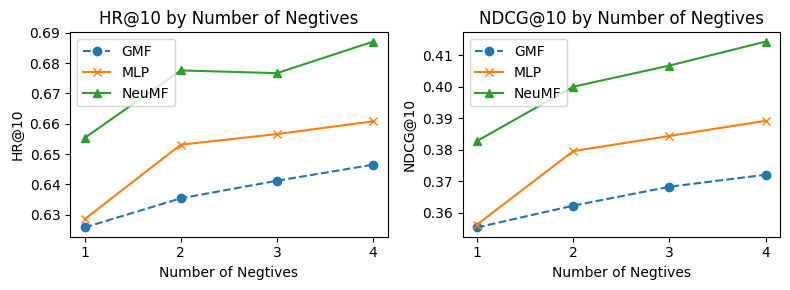

In [18]:
import matplotlib.pyplot as plt

# HR@10 数据
epochs = [1, 2, 3, 4]
gmf_hr = [0.6258, 0.6354, 0.6412, 0.6465]
mlp_hr = [0.6285, 0.6531, 0.6566, 0.6608]
neumf_hr = [0.6553, 0.6776, 0.6767, 0.6871]

# NDCG@10 数据
gmf_ndcg = [0.3554, 0.3623, 0.3683, 0.3721]
mlp_ndcg = [0.3563, 0.3796, 0.3844, 0.3892]
neumf_ndcg = [0.3828, 0.4000, 0.4067, 0.4143]

# 创建图形和轴
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# 绘制 HR@10 的折线图
ax1.plot(epochs, gmf_hr, marker='o', linestyle='--', label='GMF')
ax1.plot(epochs, mlp_hr, marker='x', linestyle='-', label='MLP')
ax1.plot(epochs, neumf_hr, marker='^', linestyle='-', label='NeuMF')

# 添加一些文本标签和样式
ax1.set_xlabel('Number of Negtives')
ax1.set_ylabel('HR@10')
ax1.set_title('HR@10 by Number of Negtives')
ax1.set_xticks(epochs)
ax1.legend()

# 绘制 NDCG@10 的折线图
ax2.plot(epochs, gmf_ndcg, marker='o', linestyle='--', label='GMF')
ax2.plot(epochs, mlp_ndcg, marker='x', linestyle='-', label='MLP')
ax2.plot(epochs, neumf_ndcg, marker='^', linestyle='-', label='NeuMF')

# 添加一些文本标签和样式
ax2.set_xlabel('Number of Negtives')
ax2.set_ylabel('NDCG@10')
ax2.set_title('NDCG@10 by Number of Negtives')
ax2.set_xticks(epochs)
ax2.legend()

# 显示图表
plt.tight_layout()
plt.show()


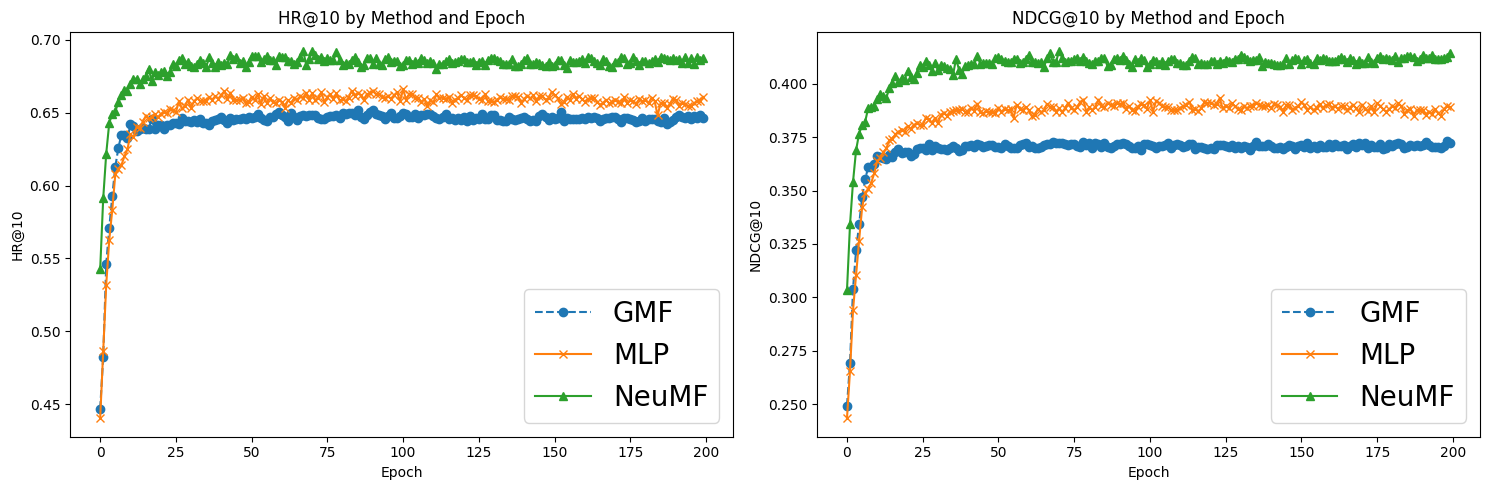

In [21]:
import re
import matplotlib.pyplot as plt

# 定义正则表达式模式
loss_pattern = re.compile(r'\[Training Epoch (\d+)\], Loss ([\d\.]+)')
eval_pattern = re.compile(r'\[Evluating Epoch \d+\] HR = ([\d\.]+), NDCG = ([\d\.]+)')

# 提取文件数据的函数
def extract_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        content = file.read()
        loss_matches = loss_pattern.findall(content)
        eval_matches = eval_pattern.findall(content)
        if len(loss_matches) == len(eval_matches):
            for i in range(len(loss_matches)):
                epoch = int(loss_matches[i][0])
                loss = float(loss_matches[i][1])
                hr = float(eval_matches[i][0])
                ndcg = float(eval_matches[i][1])
                data.append((epoch, loss, hr, ndcg))
        else:
            print(f"Mismatch between loss and evaluation matches in {file_path}")
    return data

# 提取每个文件的数据
gmf_data = extract_data('src/gmf-4.out')
mlp_data = extract_data('src/mlp-4.out')
neumf_data = extract_data('src/neumf-4.out')

# 分别提取每个指标的数据
epochs = [record[0] for record in gmf_data]
gmf_loss = [record[1] for record in gmf_data]
gmf_hr = [record[2] for record in gmf_data]
gmf_ndcg = [record[3] for record in gmf_data]

mlp_loss = [record[1] for record in mlp_data]
mlp_hr = [record[2] for record in mlp_data]
mlp_ndcg = [record[3] for record in mlp_data]

neumf_loss = [record[1] for record in neumf_data]
neumf_hr = [record[2] for record in neumf_data]
neumf_ndcg = [record[3] for record in neumf_data]

# 创建图形和轴
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# # 绘制 Loss 的折线图
# axs[0].plot(epochs, gmf_loss, marker='o', linestyle='--', label='GMF')
# axs[0].plot(epochs, mlp_loss, marker='x', linestyle='-', label='MLP')
# axs[0].plot(epochs, neumf_loss, marker='^', linestyle='-', label='NeuMF')
# axs[0].set_xlabel('Epoch')
# axs[0].set_ylabel('Loss')
# axs[0].set_title('Loss by Method and Epoch')
# axs[0].legend()

# 绘制 HR@10 的折线图
axs[0].plot(epochs, gmf_hr, marker='o', linestyle='--', label='GMF')
axs[0].plot(epochs, mlp_hr, marker='x', linestyle='-', label='MLP')
axs[0].plot(epochs, neumf_hr, marker='^', linestyle='-', label='NeuMF')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('HR@10')
axs[0].set_title('HR@10 by Method and Epoch')
axs[0].legend(fontsize=20)

# 绘制 NDCG@10 的折线图
axs[1].plot(epochs, gmf_ndcg, marker='o', linestyle='--', label='GMF')
axs[1].plot(epochs, mlp_ndcg, marker='x', linestyle='-', label='MLP')
axs[1].plot(epochs, neumf_ndcg, marker='^', linestyle='-', label='NeuMF')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('NDCG@10')
axs[1].set_title('NDCG@10 by Method and Epoch')
axs[1].legend(fontsize=20)

# 调整布局
plt.tight_layout()
plt.show()
